In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

#inpath = '/MFMDatasets/MFM_bopf/src/multi_predict/'
inpath = '/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/'
outdir = '/MFMDatasets/MFM_bopf/src/multi_predict/results/'
#out_flag = True
out_flag = False

#Cutoff_stat = "Fb2_2"
#SORT_STAT = "Fb2_2"
Cutoff_stat = "MCC"
SORT_STAT = "MCC"
#Cutoff_stat = "PR_AUC"
#SORT_STAT = "PR_AUC"
#Cutoff_stat = "ROC_AUC"
#SORT_STAT = "ROC_AUC"
#Cutoff_stat = "precision_2"
#SORT_STAT = "precision_2"

# Cut off value for given stat.
#CUTOFF = 0.2
CUTOFF = 0.0


#alg_cols = ['CLF_time(min)','target','under_alg']
alg_cols = ['CLF_time(min)','target','pred_alg','under_alg','feats','period','samp_strat']
#alg_cols = ['CLF_time(min)','target','pred_alg','under_alg','sample_weights','feats','period']
#alg_cols = ['CLF_time(min)','target','under_alg','samp_strat']
#stat_cols = ['TP','FN','FP','TN','precision_2','recall_2','Spec_2',
#stat_cols = ['TP','FN','FP','TN','NTP','NFN','NFP','NTN','precision_2','recall_2','Spec_2',
stat_cols = ['NTP','NFN','NFP','NTN','acc','precision_2','recall_2','Spec_2',
            'ROC_AUC','PR_AUC','MCC','Fb1_2','Fb2_2'
#             ,'Fb05_2','Gmean_2','Gmean_ma','Max Gmean','Max Thresh'
            ]

#period = "-P*"
period = "-PI"
#period = "-Pre"

#target = "*"
#target = "trans*"
target = "trans_loss"
#target = "transfus_yes"
#target = "high_EBL"

#alg = "LR"
#spec_cols = ['p_C','p_solver']
#spec_cols = ['p_C','p_solver','p_class_weight']

#alg = "NB"
#spec_cols = ['p_var_smoothing']

#alg = "SVC"
#spec_cols = ['p_C','p_kernel','p_degree','p_class_weight','p_gamma']

#alg = "MLP"
#spec_cols = ['p_alpha','p_hidden_layer_sizes']

#alg = "RF"
#spec_cols = ['p_n_estimators','p_max_depth','p_min_samples_leaf','p_min_samples_split']
#spec_cols = ['p_n_estimators','p_max_depth','p_min_samples_leaf','p_min_samples_split',"p_class_weight"]

alg = "GB"
spec_cols = ['p_n_estimators','p_max_features','p_min_samples_split','p_max_depth','p_subsample','p_min_samples_leaf','p_learning_rate']
#spec_cols = ['p_n_estimators','p_min_samples_split','p_max_depth','p_subsample','p_min_samples_leaf','p_max_features','p_learning_rate']

alg_cols.extend(spec_cols)
alg_cols.extend(stat_cols)

outpath = outdir + target + period + "-" + alg 
print(outpath)

os.chdir(inpath + alg + '/output')
#os.chdir(inpath + alg + '/2021_11_s41/output')
#os.chdir(inpath + alg + '/2021_11_s44/output')
#os.chdir(inpath + alg + '/2021_11_s48/output')
#os.chdir(inpath + alg + '/2021_11_s49/output')
#os.chdir(inpath + alg + '/2021_04-Paper/output')
#os.chdir(inpath + alg + '/2021_08_freq1/output')
#os.chdir(inpath + alg + '/2021_08_Freq_hyper/output')
print(os.getcwd())

ext = '.csv'
glob_string = target + period + "-*" + alg + "-*"
#glob_string = target + period + "-Union50*" + alg + "-*"
print(glob_string + ext)
files = glob.glob(glob_string + ext)

len(files)

/MFMDatasets/MFM_bopf/src/multi_predict/results/trans_loss-PI-GB
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output
trans_loss-PI-*GB-*.csv


64

In [2]:
if target:
    print(target)

trans_loss


In [3]:
def remove_dups(file):
    base = glob.escape(file[:-4])
    print(f'base = {base}')
    dup_files = glob.glob(base + '*')
    print(dup_files)
    for dup_file in dup_files:
        print(f'Removing duplicate: {dup_file}')
        os.remove(dup_file)

In [4]:
files = sorted(files, reverse=True)
for i in range(len(files)-1):
    if files[i][:-20] == files[i+1][:-20]:
        print(f'DUP:{files[i]}')
        #remove_dups(files[i])

files = glob.glob(glob_string + ext)
files = sorted(files, reverse=True)
print(f'len(files) = {len(files)}')

len(files) = 64


In [5]:
results_df = pd.DataFrame()
prev_f = ""
for idx, f in enumerate(files):
    print(f'idx={idx}; file={f}')
    if prev_f[:-20] == f[:-20]:   #if the filenames only differ by timestamp
        print(f'DUP:{prev_f}')
        continue   #skip "duplicate"
        
    ########
    # 'class_weight' kludge is UGLY; remove soon
    ########
    if results_df.empty:
        results_df = pd.read_csv(f, header=None, index_col=0, names=[idx])
        if 'p_class_weight' not in results_df.index:
            results_df.loc['p_class_weight'] = 'default'
    else:
        this_df = pd.read_csv(f, header=None, index_col=0, names=[idx])
        if 'p_class_weight' not in this_df.index:
            this_df.loc['p_class_weight'] = 'default'
        results_df = results_df.merge(this_df, left_index=True, right_index=True, how="right")
    prev_f = f
results_df

idx=0; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_sqrt_30_30_60_7_0.8-1-1.0-20211124_162250.csv
idx=1; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_sqrt_30_30_50_7_0.8-1-1.0-20211124_162250.csv
idx=2; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_sqrt_30_30_40_7_0.8-1-1.0-20211124_162250.csv
idx=3; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_sqrt_30_30_30_7_0.8-1-1.0-20211124_162250.csv
idx=4; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_sqrt_30_30_20_7_0.8-1-1.0-20211124_162249.csv
idx=5; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_None_30_30_60_7_0.8-1-1.0-20211124_162250.csv
idx=6; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_None_30_30_50_7_0.8-1-1.0-20211124_162249.csv
idx=7; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_None_30_30_40_7_0.8-1-1.0-20211124_162249.csv
idx=8; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_None_30_30_30_7_0.8-1-1.0-20211124_162249.csv
idx=9; file=trans_loss-PI-ALL-RAND-GB-friedman_mse_0.1_5_None_30_30_20_7_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
CLF_time(min),0.003,0.002,0.002,0.002,0.002,0.004,0.003,0.003,0.003,0.002,0.003,0.002,0.001,0.004,0.005,0.004,0.003,0.003,0.003,0.004,0.002,0.004,0.003,0.005,0.003,0.003,0.003,0.003,0.004,0.002,0.005,0.005,0.010,0.009,0.007,0.006,0.005,0.046,0.039,0.034,0.027,0.017,0.011,0.007,0.003,0.021,0.031,0.025,0.015,0.015,0.010,0.022,0.004,0.018,0.013,0.020,0.016,0.012,0.010,0.008,0.016,0.003,0.013,0.051
target,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss
period,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI,PI
under_alg,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
pred_alg,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB,GB
seed,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
feats,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL
samp_strat,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sample_tts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sample_weights,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
results_T = results_df.T
#results_T[SORT_STAT] = pd.to_numeric(results_T[SORT_STAT])  # convert to float for sorting
results_T.sort_values(by=[SORT_STAT], ascending=False, inplace=True)
results_T.loc[:,'NTP'] = np.around(10000 * results_T['NTP'].astype(float), 0).astype(int)
results_T.loc[:,'NFN'] = np.around(10000 * results_T['NFN'].astype(float), 0).astype(int)
results_T.loc[:,'NFP'] = np.around(10000 * results_T['NFP'].astype(float), 0).astype(int)
results_T.loc[:,'NTN'] = np.around(10000 * results_T['NTN'].astype(float), 0).astype(int)

small = results_T[alg_cols]
#small[small['feats'] == 'Union50']
small

,CLF_time(min),target,pred_alg,under_alg,feats,period,samp_strat,p_n_estimators,p_max_features,p_min_samples_split,p_max_depth,p_subsample,p_min_samples_leaf,p_learning_rate,NTP,NFN,NFP,NTN,acc,precision_2,recall_2,Spec_2,ROC_AUC,PR_AUC,MCC,Fb1_2,Fb2_2
62,0.013,trans_loss,GB,NONE,ALL,PI,1.0,100,10,30,5,0.8,30,0.1,114,58,1722,8106,0.8220,0.0621,0.6627,0.8248,0.8243,0.0739,0.1637,0.1135,0.2258
57,0.012,trans_loss,GB,NONE,ALL,PI,1.0,90,10,30,5,0.8,30,0.1,114,58,1815,8013,0.8127,0.0591,0.6627,0.8153,0.8239,0.0748,0.1575,0.1085,0.2177
58,0.010,trans_loss,GB,NONE,ALL,PI,1.0,80,10,30,5,0.8,30,0.1,118,54,1952,7877,0.7995,0.0571,0.6867,0.8014,0.8268,0.0759,0.1566,0.1054,0.2141
48,0.015,trans_loss,GB,NONE,ALL,PI,1.0,90,20,30,5,0.8,30,0.1,102,70,1490,8339,0.8440,0.0638,0.5904,0.8484,0.8184,0.0862,0.1560,0.1152,0.2227
49,0.015,trans_loss,GB,NONE,ALL,PI,1.0,80,20,30,5,0.8,30,0.1,106,66,1641,8187,0.8293,0.0605,0.6145,0.8331,0.8205,0.0890,0.1532,0.1102,0.2170
60,0.016,trans_loss,GB,NONE,ALL,PI,1.0,120,10,30,5,0.8,30,0.1,102,70,1579,8249,0.8351,0.0604,0.5904,0.8394,0.8147,0.0689,0.1494,0.1096,0.2143
59,0.008,trans_loss,GB,NONE,ALL,PI,1.0,50,10,30,5,0.8,30,0.1,128,44,2457,7371,0.7499,0.0497,0.7470,0.7500,0.8232,0.0836,0.1476,0.0932,0.1962
53,0.018,trans_loss,GB,NONE,ALL,PI,1.0,100,20,30,5,0.8,30,0.1,93,79,1380,8448,0.8542,0.0633,0.5422,0.8596,0.8142,0.0720,0.1474,0.1134,0.2157
35,0.006,trans_loss,GB,NONE,ALL,PI,1.0,30,sqrt,30,5,0.8,30,0.1,137,35,2793,7035,0.7172,0.0467,0.7952,0.7159,0.8132,0.0751,0.1460,0.0882,0.1890
50,0.010,trans_loss,GB,NONE,ALL,PI,1.0,50,20,30,5,0.8,30,0.1,118,54,2142,7686,0.7804,0.0522,0.6867,0.7820,0.8160,0.0800,0.1457,0.0971,0.2003


In [7]:
filename = outpath + '-' + SORT_STAT + '-Results.csv'
print(filename)
if out_flag:
    small.to_csv(filename, float_format='%0.4f')

/MFMDatasets/MFM_bopf/src/multi_predict/results/trans_loss-PI-GB-MCC-Results.csv


In [8]:
# already in the correct directory from above: os.chdir(inpath + alg + '/output')
ext = '.out'
#files = glob.glob("*-" + alg + "-*" + ext)
#files = glob.glob("Hyster" + glob_prefix + ext)
files = glob.glob(glob_string + ext)
print(f'len(files) = {len(files)}')


len(files) = 64


In [9]:
files = sorted(files, reverse=True)
for i in range(len(files)-1):
    #print(f'i={i}; file={files[i]}')
    if files[i][:-20] == files[i+1][:-20]:
        print(f'{files[i]}')
print(f'len(files) = {len(files)}')

len(files) = 64


In [10]:
from tokenize import tokenize

high_coeff_files = set()
pd.options.display.float_format = '{:,.4f}'.format
prev_f = ""
coeffs_df = pd.DataFrame()
coeffs_rank_df = pd.DataFrame()
for idx, f in enumerate(files):
    #print(f'idx={idx}; file={f}')
    if prev_f[:-20] == f[:-20]:   #if the filenames only differ by timestamp
        print(f'DUP:{prev_f}')
        continue   #skip "duplicate"
 
    with open(f, 'r') as file:
        found_coef = False
        cutoff = False
        coef_series = pd.Series()
        ind_vars = []
        coef_vals = []
        for line in file:
            # Cutoff stat
            if Cutoff_stat in line:
                cut_stat = line.split()[2]   
                if float(cut_stat) < CUTOFF:
                    cutoff = True
                    print(f'cut_stat = {cut_stat}; idx={idx}')
                    break    # Stop processing this file; poor performance
            
            if "coeffs =" in line:
                found_coef = True
                #print(f"found_coef: idx={idx}; file={f}")
                continue
            
            if found_coef:
                var_coef = line.split()
                if var_coef[0] != 'dtype:':
                    ind_vars.append(var_coef[0])
                    coef_vals.append(float(var_coef[1]))
                    if float(var_coef[1]) > 100:
                        high_coeff_files.add(f)
                
        if not cutoff and found_coef:
            if coeffs_df.empty:
                coeffs_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[idx])
                coeffs_rank_df = pd.DataFrame(data=coeffs_df[idx].rank(ascending=False).astype(int), columns=[idx])
            else:
                this_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[idx])
                this_rank_df = pd.DataFrame(data=this_df[idx].rank(ascending=False).astype(int), columns=[idx])
                coeffs_df = coeffs_df.merge(this_df, left_index=True, right_index=True, how="left")
                coeffs_rank_df = coeffs_rank_df.merge(this_rank_df, left_index=True, right_index=True, how="left")

    prev_f = f
    
coeffs_df

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
Delmode,0.2243,0.2301,0.2375,0.2429,0.2656,0.4391,0.4623,0.4956,0.5411,0.6040,0.2897,0.3194,0.4588,0.1542,0.1442,0.1477,0.1525,0.1569,0.1744,0.1412,0.2158,0.1488,0.2303,0.2103,0.2229,0.0824,0.0799,0.0815,0.0805,0.0000,0.0803,0.4471,0.1492,0.1561,0.1646,0.1753,0.1916,0.3880,0.4012,0.4215,0.4553,0.4970,0.1203,0.1409,0.2251,0.1857,0.1692,0.1758,0.1523,0.1571,0.1738,0.1422,0.2128,0.1479,0.1113,0.1009,0.1049,0.1205,0.1245,0.1386,0.1139,0.2096,0.1186,0.5270
Insurance,0.1595,0.1631,0.1729,0.1872,0.1866,0.0012,0.0012,0.0005,0.0000,0.0000,0.1233,0.1309,0.1420,0.1941,0.1740,0.1831,0.1430,0.1469,0.1643,0.1311,0.2085,0.1389,0.0913,0.0846,0.0877,0.2459,0.2533,0.2746,0.2289,0.3386,0.2411,0.0122,0.1383,0.1460,0.1525,0.1624,0.1729,0.0126,0.0123,0.0097,0.0061,0.0044,0.0955,0.1117,0.0479,0.0578,0.0542,0.0552,0.0954,0.0975,0.1073,0.0912,0.1341,0.0933,0.1483,0.1348,0.1402,0.0973,0.0996,0.1118,0.0923,0.1121,0.0960,0.0083
Admefface,0.0871,0.0906,0.0921,0.1012,0.0977,0.0360,0.0330,0.0307,0.0260,0.0196,0.0965,0.0960,0.1317,0.0452,0.0431,0.0440,0.0527,0.0521,0.0531,0.0531,0.0777,0.0525,0.0845,0.0810,0.0818,0.0715,0.0715,0.0780,0.0690,0.1151,0.0712,0.0171,0.0395,0.0414,0.0405,0.0405,0.0442,0.0327,0.0325,0.0323,0.0313,0.0336,0.0409,0.0423,0.0639,0.0507,0.0503,0.0510,0.0564,0.0571,0.0612,0.0546,0.0784,0.0555,0.0386,0.0391,0.0389,0.0498,0.0505,0.0543,0.0487,0.0600,0.0491,0.0331
new_BMI,0.0849,0.0868,0.0906,0.0877,0.0644,0.0984,0.1001,0.1045,0.1041,0.1056,0.0916,0.0816,0.0000,0.0753,0.0744,0.0740,0.0746,0.0747,0.0802,0.0789,0.0568,0.0779,0.0968,0.0974,0.0939,0.0838,0.0839,0.0731,0.0932,0.0632,0.0852,0.0667,0.0566,0.0580,0.0566,0.0585,0.0534,0.0539,0.0543,0.0517,0.0509,0.0468,0.0403,0.0381,0.0181,0.0641,0.0647,0.0650,0.0608,0.0610,0.0620,0.0596,0.0771,0.0599,0.0534,0.0558,0.0547,0.0535,0.0554,0.0566,0.0530,0.0577,0.0527,0.0439
TrialLabor,0.0516,0.0521,0.0521,0.0557,0.0628,0.0075,0.0063,0.0059,0.0055,0.0000,0.0430,0.0500,0.0581,0.0164,0.0163,0.0154,0.0533,0.0550,0.0615,0.0498,0.0689,0.0519,0.0464,0.0412,0.0440,0.0732,0.0754,0.0821,0.0692,0.1451,0.0713,0.0035,0.0128,0.0127,0.0123,0.0132,0.0145,0.0012,0.0005,0.0005,0.0000,0.0000,0.0151,0.0173,0.0174,0.0170,0.0162,0.0165,0.0104,0.0108,0.0112,0.0099,0.0123,0.0101,0.0110,0.0106,0.0109,0.0060,0.0059,0.0052,0.0058,0.0034,0.0060,0.0004
Admcontract,0.0489,0.0509,0.0496,0.0529,0.0596,0.0125,0.0132,0.0110,0.0120,0.0099,0.0465,0.0539,0.0636,0.0388,0.0368,0.0377,0.0463,0.0476,0.0489,0.0440,0.0644,0.0457,0.0384,0.0347,0.0361,0.0461,0.0465,0.0534,0.0446,0.0978,0.0452,0.0102,0.0114,0.0115,0.0111,0.0120,0.0105,0.0109,0.0108,0.0115,0.0121,0.0135,0.0059,0.0067,0.0004,0.0090,0.0090,0.0089,0.0113,0.0110,0.0109,0.0117,0.0006,0.0116,0.0065,0.0065,0.0065,0.0091,0.0087,0.0065,0.0097,0.0020,0.0091,0.0132
Admpresent,0.0391,0.0402,0.0415,0.0435,0.0482,0.0348,0.0359,0.0356,0.0364,0.0371,0.0246,0.0233,0.0182,0.0474,0.0433,0.0452,0.0661,0.0667,0.0749,0.0622,0.1082,0.0643,0.0435,0.0417,0.0433,0.0433,0.0435,0.0438,0.0408,0.0111,0.0422,0.0221,0.0132,0.0128,0.0136,0.0146,0.0156,0.0106,0.0100,0.0100,0.0103,0.0104,0.0194,0.0215,0.0223,0.0071,0.0076,0.0075,0.0228,0.0228,0.0256,0.0223,0.0277,0.0226,0.0288,0.0264,0.0270,0.0158,0.0164,0.0172,0.0164,0.0144,0.0156,0.0058
BESTGA,0.0359,0.0319,0.0223,0.0246,0.0272,0.0396,0.0397,0.0412,0.0426,0.0410,0.0153,0.0093,0.0060,0.0253,0.0310,0.0292,0.0208,0.0192,0.0115,0.0235,0.0093,0.0232,0.0377,0.0395,0.0384,0.0124,0.0106,0.0033,0.0193,0.0000,0.0159,0.0349,0.0212,0.0206,0.0189,0.0162,0.0164,0.0364,0.0356,0.0373,0.0369,0.0328,0.0263,0.0246,0.0123,0.0283,0.0291,0.0284,0.0209,0.0207,0.0180,0.0223,0.0073,0.0214,0.0230,0.0269,0.0232,0.0195,0.0193,0.0179,0.0216,0.0047,0.0199,0.0207
new_age,0.0346,0.0346,0.0340,0.0353,0.0365,0.0437,0.0439,0.0341,0.0213,0.0158,0.0217,0.0204,0.0087,0.0417,0.0492,0.0474,0.0212,0.0191,0.0105,0.0291,0.0041,0

In [11]:
coeffs_df_inv = coeffs_df.T
coeffs_df_inv.loc

In [12]:
if out_flag:
    filename = outpath + '-' + SORT_STAT + '-coeffs.csv'
    print(filename)
    coeffs_df_inv.to_csv(filename)

In [13]:
coeffs_rank_df['mean_rank'] = coeffs_rank_df.apply(np.mean, axis=1).rank().astype(int)
coeffs_rank_df = coeffs_rank_df.astype('Int64')
coeffs_rank_df.sort_values('mean_rank', inplace=True)
print(f'Count: {coeffs_rank_df.shape}')
len(coeffs_rank_df)
coeffs_rank_df

Count: (194, 65)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,mean_rank
Delmode,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,3,3,3,3,107,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1
new_BMI,4,4,4,4,4,2,2,2,2,2,4,4,106,3,3,3,3,3,3,3,7,3,2,2,2,2,2,5,2,5,2,2,3,3,3,3,4,3,2,3,3,2,5,7,18,2,2,2,3,3,3,4,4,4,3,3,3,4,3,3,4,5,4,2,2
Admefface,3,3,3,3,3,6,7,7,6,7,3,3,3,7,8,8,6,6,6,6,4,6,4,4,4,5,5,4,5,3,5,8,6,6,6,6,5,8,8,8,7,5,4,4,3,5,5,5,5,5,4,5,3,5,6,5,5,5,5,4,5,4,5,4,3
new_age,9,8,8,8,8,4,4,6,8,9,10,10,11,8,6,6,13,14,20,11,19,14,10,9,10,10,10,8,9,8,9,3,4,4,5,5,6,2,3,2,2,4,3,6,7,3,3,3,4,4,5,3,6,3,4,4,4,3,4,6,3,6,3,3,4
Insurance,2,2,2,2,2,31,30,33,113,110,2,2,2,1,1,1,2,2,2,2,2,2,3,3,3,1,1,1,1,1,1,12,2,2,2,2,2,14,14,17,23,26,2,2,5,4,4,4,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,14,5
Parity,13,13,13,27,29,9,9,9,7,8,7,8,6,10,10,10,7,7,8,7,8,8,12,13,12,9,9,9,10,6,10,14,8,7,8,7,7,5,4,4,4,3,16,20,12,16,15,15,9,9,9,9,9,9,13,11,12,8,8,9,8,10,8,5,6
AdmDBP,15,17,17,15,16,3,3,3,4,4,12,17,18,4,4,4,8,9,9,5,23,5,6,5,5,8,8,10,8,107,8,5,9,8,7,8,14,4,6,7,8,8,10,13,25,6,6,6,8,8,8,7,12,8,8,8,8,10,12,14,9,22,9,7,7
AdmSBP,14,14,15,14,13,8,8,8,12,11,11,14,106,6,5,5,10,10,11,10,13,10,11,11,11,14,14,18,14,11,14,9,7,9,9,9,11,6,5,6,6,7,8,8,22,7,7,7,7,7,7,6,11,6,7,6,7,7,7,8,7,11,7,6,8
Admpresent,7,7,7,7,7,7,6,5,5,5,8,9,8,5,7,7,4,4,4,4,3,4,7,6,7,7,7,7,7,13,7,7,17,18,17,16,13,16,17,16,15,15,17,15,11,28,28,27,11,12,11,11,8,11,9,10,9,18,18,15,18,16,18,23,9
BESTGA,8,9,10,9,10,5,5,4,3,3,13,18,15,12,11,11,14,13,18,13,15,12,9,8,8,18,20,29,15,107,15,4,11,11,12,15,12,7,7,5,5,6,9,11,24,10,10,10,13,13,14,12,23,13,12,9,11,14,14,13,12,31,13,8,10


In [14]:
coeffs_rank_inv = coeffs_rank_df.T
combo = pd.concat([small, coeffs_rank_inv], axis=1, join='inner')
combo

,CLF_time(min),target,pred_alg,under_alg,feats,period,samp_strat,p_n_estimators,p_max_features,p_min_samples_split,p_max_depth,p_subsample,p_min_samples_leaf,p_learning_rate,NTP,NFN,NFP,NTN,acc,precision_2,recall_2,Spec_2,ROC_AUC,PR_AUC,MCC,Fb1_2,Fb2_2,Delmode,new_BMI,Admefface,new_age,Insurance,Parity,AdmDBP,AdmSBP,Admpresent,BESTGA,high_Gravidity,momrace_new,Admcontract,Dilat_lst,Admreason,TrialLabor,Marital,prelaborCD,Analgesia,GAmethod,ROMmeth,MthInd_Miso,Education,Hxcsection,Antehospital,Ind_Unkn,Induction,Lac_None,CS_UScar,IUPC,Intrafetdistress,CS_FTP,uscar,ChronicHBP,HxnumCS,new_high_BMI,Lac_Min,spontlabor,Meconium,high_height,CS_NRFHT,FSE,intra_abruptio,Antefetdistress,SE_pre,AnteUTI,Episiotomy,Hxmacrosomia,ImposedPE,Oligo,Presentdel,new_high_Age,Hxheartdis,Smoke,gest_diab,AnteGBS,ThreatenedPB,Malpresentation9,CS_Fetmac,Hxpreterm,Antechorio,MthInd_Oxy,CS_Breech,pre_diab,HIV,GestHBP,ROM,chorio9,Heart_disease_comb,intra_previa,Hxdepression,Ind_Postdate,AnteLGA,Anteprevia,HxGIdis,CS_Elect,breech,AnteSTD,Cerclage,GI_disease_comb,CS_Finduct,Ind_HTN,Ind_FComp,HxSTD,pre_PROM,Hxasthma,CS_Other,depression_comb,chorio,Druguse,CS_HTNdis,Intrafever,breech9,AnteGDM,gest_htn,Alcohol,Delfetalpos,vertex,Intrachorio,Diabetes,Ind_Mcond,Operative,Polyhydramnios,Hxanemia,Rhincompat,M_pre,Antefetaldth,AnteSGA,CPD,Anteanemia,Hxthyroid,prim_hypo,no_TD,Incompetence,Lac_Other,TD_nos,Shoulder,CS_Fetanom,eclamp,Ind_Still,Urupture,CS_HIV,CS_Fforceps,Anteabruption,ART,CS_Chorio,Eclampsia,ECV,Prolapse,gi_disease9,HospElectInd,MthInd_AROM,Momseizure,Hxstillbirth,HospElectCS,Hxrenaldis,Admcervpos,CS_HxShoulder,Hostype,Augment,Activeherpes,Antethyroid,Antethrombo,Antesteroid,DMControl,Admconsistency,CS_Mult,Hxseizure,Hyp_clon,other_TD,Ind_Fmacro,Ind_Hxfetal,Ind_HxMat,AnteCHBP,CS_Emerg,Lac_Majperi,Lac_Majoth,Lac_Cerv,CS_FVBAC,Intratocolytix,IntraMgSO,HosEpiNurse,CS_Shoulder,HosEpitype,Hyp_any,Inoxy_incrdose,Dehiscence,Hyp_othr,Hyp_hydr,Ind_elect,AdmBishop,Ind_Chorio,Antebleed3,PostHBP,Preeclampsia,MthInd_PGE2,renal_disease9,Hyp_calc,Anteasthma,threatpb9,UnspecHBP,version9,renal_disease_comb,MthInd_Mec,iufd9,Ind_Vbleed,Hyp_ace,Hyp_alpha,Hyp_beta,Hyp_meth,hypertyro,iatro_hypo,Ind_anomaly,Accrete
62,0.013,trans_loss,GB,NONE,ALL,PI,1.0,100,10,30,5,0.8,30,0.1,114,58,1722,8106,0.8220,0.0621,0.6627,0.8248,0.8243,0.0739,0.1637,0.1135,0.2258,1,4,5,3,2,8,9,7,18,13,15,14,27,16,11,34,22,6,20,37,23,19,29,12,30,24,49,31,43,70,28,68,60,67,26,21,10,64,51,46,91,53,17,35,54,38,25,32,36,45,47,86,42,57,63,44,39,76,40,84,56,62,75,50,55,41,59,52,72,79,80,88,78,48,89,58,104,77,69,100,71,105,81,61,99,85,96,108,33,73,66,82,101,90,92,74,94,65,111,106,95,83,102,107,97,114,110,98,93,103,112,154,109,113,87,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154
57,0.012,trans_loss,GB,NONE,ALL,PI,1.0,90,10,30,5,0.8,30,0.1,114,58,1815,8013,0.8127,0.0591,0.6627,0.8153,0.8239,0.0748,0.1575,0.1085,0.2177,1,4,5,3,2,8,10,7,18,14,15,13,27,16,11,34,22,6,20,37,24,19,28,12,30,25,49,31,42,70,29,68,63,67,26,21,9,62,52,48,90,51,17,36,54,38,23,32,35,45,47,86,43,57,60,44,39,75,40,85,53,59,73,50,55,41,58,65,72,77,80,88,78,46,89,56,101,76,69,99,71,103,81,66,100,83,94,106,33,79,64,82,96,97,91,74,93,61,110,105,102,84,107,109,98,114,112,95,92,104,111,154,108,113,87,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154
58,0.010,trans_loss,GB,NONE,ALL,PI,1.0,80,10,30,5,0.8,30,0.1,118,54,1952,7877,0.7995,0.0571,0.6867,0.8014,0.8268,0.0759,0.1566,0.1054,0.2141,1,3,5,4,2,8,12,7,18,14,15,13,27,1

In [15]:
if out_flag:
    filename = outpath + '-' + SORT_STAT + '-combo.csv'
    print(filename)
    combo.to_csv(filename)

In [16]:
combo2 = pd.concat([combo, coeffs_df_inv], axis=1, join='inner')
combo2

,CLF_time(min),target,pred_alg,under_alg,feats,period,samp_strat,p_n_estimators,p_max_features,p_min_samples_split,p_max_depth,p_subsample,p_min_samples_leaf,p_learning_rate,NTP,NFN,NFP,NTN,acc,precision_2,recall_2,Spec_2,ROC_AUC,PR_AUC,MCC,Fb1_2,Fb2_2,Delmode,new_BMI,Admefface,new_age,Insurance,Parity,AdmDBP,AdmSBP,Admpresent,BESTGA,high_Gravidity,momrace_new,Admcontract,Dilat_lst,Admreason,TrialLabor,Marital,prelaborCD,Analgesia,GAmethod,ROMmeth,MthInd_Miso,Education,Hxcsection,Antehospital,Ind_Unkn,Induction,Lac_None,CS_UScar,IUPC,Intrafetdistress,CS_FTP,uscar,ChronicHBP,HxnumCS,new_high_BMI,Lac_Min,spontlabor,Meconium,high_height,CS_NRFHT,FSE,intra_abruptio,Antefetdistress,SE_pre,AnteUTI,Episiotomy,Hxmacrosomia,ImposedPE,Oligo,Presentdel,new_high_Age,Hxheartdis,Smoke,gest_diab,AnteGBS,ThreatenedPB,Malpresentation9,CS_Fetmac,Hxpreterm,Antechorio,MthInd_Oxy,CS_Breech,pre_diab,HIV,GestHBP,ROM,chorio9,Heart_disease_comb,intra_previa,Hxdepression,Ind_Postdate,AnteLGA,Anteprevia,HxGIdis,CS_Elect,breech,AnteSTD,Cerclage,GI_disease_comb,CS_Finduct,Ind_HTN,Ind_FComp,HxSTD,pre_PROM,Hxasthma,CS_Other,depression_comb,chorio,Druguse,CS_HTNdis,Intrafever,breech9,AnteGDM,gest_htn,Alcohol,Delfetalpos,vertex,Intrachorio,Diabetes,Ind_Mcond,Operative,Polyhydramnios,Hxanemia,Rhincompat,M_pre,Antefetaldth,AnteSGA,CPD,Anteanemia,Hxthyroid,prim_hypo,no_TD,Incompetence,Lac_Other,TD_nos,Shoulder,CS_Fetanom,eclamp,Ind_Still,Urupture,CS_HIV,CS_Fforceps,Anteabruption,ART,CS_Chorio,Eclampsia,ECV,Prolapse,gi_disease9,HospElectInd,MthInd_AROM,Momseizure,Hxstillbirth,HospElectCS,Hxrenaldis,Admcervpos,CS_HxShoulder,Hostype,Augment,Activeherpes,Antethyroid,Antethrombo,Antesteroid,DMControl,Admconsistency,CS_Mult,Hxseizure,Hyp_clon,other_TD,Ind_Fmacro,Ind_Hxfetal,Ind_HxMat,AnteCHBP,CS_Emerg,Lac_Majperi,Lac_Majoth,Lac_Cerv,CS_FVBAC,Intratocolytix,IntraMgSO,HosEpiNurse,CS_Shoulder,HosEpitype,Hyp_any,Inoxy_incrdose,Dehiscence,Hyp_othr,Hyp_hydr,Ind_elect,AdmBishop,Ind_Chorio,Antebleed3,PostHBP,Preeclampsia,MthInd_PGE2,renal_disease9,Hyp_calc,Anteasthma,threatpb9,UnspecHBP,version9,renal_disease_comb,MthInd_Mec,iufd9,Ind_Vbleed,Hyp_ace,Hyp_alpha,Hyp_beta,Hyp_meth,hypertyro,iatro_hypo,Ind_anomaly,Accrete,Delmode,Insurance,Admefface,new_BMI,TrialLabor,Admcontract,Admpresent,BESTGA,new_age,high_Gravidity,HxnumCS,Lac_None,Parity,AdmSBP,AdmDBP,ChronicHBP,momrace_new,Dilat_lst,Marital,CS_UScar,MthInd_Miso,Hxcsection,ROMmeth,IUPC,prelaborCD,CS_FTP,Admreason,Education,Antehospital,Intrafetdistress,Meconium,uscar,Analgesia,GAmethod,Ind_Unkn,Induction,CS_NRFHT,high_height,Lac_Min,spontlabor,new_high_BMI,Episiotomy,FSE,Momseizure,MthInd_AROM,MthInd_Oxy,chorio,Operative,Presentdel,Prolapse,ROM,breech9,SE_pre,breech,Shoulder,Augment,Admconsistency,Urupture,vertex,Activeherpes,Admcervpos,Alcohol,AdmBishop,Anteabruption,Anteanemia,Anteasthma,Antebleed3,AnteCHBP,Antechorio,Antefetaldth,Antefetdistress,AnteGBS,chorio9,Malpresentation9,M_pre,Intrachorio,eclamp,HosEpiNurse,HosEpitype,Hyp_any,Hyp_calc,Hyp_clon,Hyp_hydr,Hyp_othr,Delfetalpos,Dehiscence,Inoxy_incrdose,intra_abruptio,intra_previa,CS_Shoulder,CS_Breech,CS_Other,Intrafever,IntraMgSO,Intratocolytix,CS_FVBAC,CS_Finduct,Lac_Cerv,Lac_Majoth,Lac_Majperi,CS_Fforceps,CS_Emerg,Lac_Other,CS_Chorio,AnteGDM,AnteUTI,AnteLGA,Anteprevia,Ind_Still,Ind_Postdate,Ind_Mcond,Ind_HxMat,Ind_Hxfetal,Ind_HTN,Ind_Fmacro,Ind_FComp,Ind_elect,Ind_Chorio,Ind_anomaly,Incompetence,ImposedPE,iatro_hypo,hypertyro,Hyp_meth,Hyp_beta,Hyp_alpha,Hyp_ace,Ind_Vbleed,iufd9,MthInd_Mec,renal_disease_comb,version9,UnspecHBP,threatpb9,ThreatenedPB,TD_nos,Smoke,Rhincompat,renal_disease9,prim_hypo,MthInd_PGE2,Preeclampsia,pre_PROM,pre_diab,PostHBP,Polyhydramnios,other_TD,Oligo,no_TD,Hxthyroid,Hxstillbirth,HxSTD,CS_Elect,Diabetes,depression_comb,CS_Mult,CS_HxShoulder,CS_HTNdis,CS_HIV,CS_Fetmac,CS_Fetanom,CPD,Druguse,Cerclage,ART,new_high_Age,Antethyroid,Antethrombo,Antesteroid,AnteSTD,AnteSGA,DMControl,Eclampsia,Hxseizure,Hostype,Hxrenaldis,Hxpreterm,Hxmacrosomia,Hxhe

In [17]:
if out_flag:
    filename = outpath + '-' + SORT_STAT + '-combo2.csv'
    print(filename)
    combo2.to_csv(filename)

In [18]:
top_index = combo.iloc[0].name
print(f'top_index = {top_index}')
#top_index = 50
files[top_index]

top_index = 62


'trans_loss-PI-ALL-NONE-GB-friedman_mse_0.1_5_10_30_30_100_7_0.8-1-1.0-20211124_162414.out'

In [19]:
small.loc[top_index]

CLF_time(min)               0.013
target                 trans_loss
pred_alg                       GB
under_alg                    NONE
feats                         ALL
period                         PI
samp_strat                    1.0
p_n_estimators                100
p_max_features                 10
p_min_samples_split            30
p_max_depth                     5
p_subsample                   0.8
p_min_samples_leaf             30
p_learning_rate               0.1
NTP                           114
NFN                            58
NFP                          1722
NTN                          8106
acc                        0.8220
precision_2                0.0621
recall_2                   0.6627
Spec_2                     0.8248
ROC_AUC                    0.8243
PR_AUC                     0.0739
MCC                        0.1637
Fb1_2                      0.1135
Fb2_2                      0.2258
Name: 62, dtype: object

In [20]:
print(alg)
print(period)
targ = small.loc[top_index]['target']
print(targ)

GB
-PI
trans_loss


# Top Predictor Histogram

In [21]:
coeffs_rank_inv.loc[top_index]

Delmode                 1
new_BMI                 4
Admefface               5
new_age                 3
Insurance               2
Parity                  8
AdmDBP                  9
AdmSBP                  7
Admpresent             18
BESTGA                 13
high_Gravidity         15
momrace_new            14
Admcontract            27
Dilat_lst              16
Admreason              11
TrialLabor             34
Marital                22
prelaborCD              6
Analgesia              20
GAmethod               37
ROMmeth                23
MthInd_Miso            19
Education              29
Hxcsection             12
Antehospital           30
Ind_Unkn               24
Induction              49
Lac_None               31
CS_UScar               43
IUPC                   70
Intrafetdistress       28
CS_FTP                 68
uscar                  60
ChronicHBP             67
HxnumCS                26
new_high_BMI           21
Lac_Min                10
spontlabor             64
Meconium    

In [22]:
top_pred = coeffs_df_inv.loc[top_index].sort_values(ascending=False)
top_pred

Delmode              0.1186
Insurance            0.0960
new_age              0.0559
new_BMI              0.0527
Admefface            0.0491
prelaborCD           0.0421
AdmSBP               0.0352
Parity               0.0316
AdmDBP               0.0240
Lac_Min              0.0232
Admreason            0.0224
Hxcsection           0.0200
BESTGA               0.0199
momrace_new          0.0194
high_Gravidity       0.0193
Dilat_lst            0.0178
intra_abruptio       0.0170
Admpresent           0.0156
MthInd_Miso          0.0142
Analgesia            0.0135
new_high_BMI         0.0122
Marital              0.0098
ROMmeth              0.0096
Ind_Unkn             0.0095
Episiotomy           0.0094
HxnumCS              0.0091
Admcontract          0.0091
Intrafetdistress     0.0090
Education            0.0089
Antehospital         0.0073
Lac_None             0.0069
Hxmacrosomia         0.0067
chorio               0.0061
TrialLabor           0.0060
Antefetdistress      0.0060
ImposedPE           

In [23]:
top_pred.sum()

1.0000000073545001

In [24]:
outpath = outdir + targ + period + "-" + alg 
filename = outpath + '-' + SORT_STAT + '-top_predictors.csv'
print(filename)
if out_flag:
    top_pred.to_csv(filename, header=False, sep='\t')

/MFMDatasets/MFM_bopf/src/multi_predict/results/trans_loss-PI-GB-MCC-top_predictors.csv


['Delmode' 'Insurance' 'new_age' 'new_BMI' 'Admefface' 'prelaborCD'
 'AdmSBP' 'Parity' 'AdmDBP' 'Lac_Min' 'Admreason' 'Hxcsection' 'BESTGA'
 'momrace_new' 'high_Gravidity' 'Dilat_lst' 'intra_abruptio' 'Admpresent'
 'MthInd_Miso' 'Analgesia' 'new_high_BMI' 'Marital' 'ROMmeth' 'Ind_Unkn'
 'Episiotomy']


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


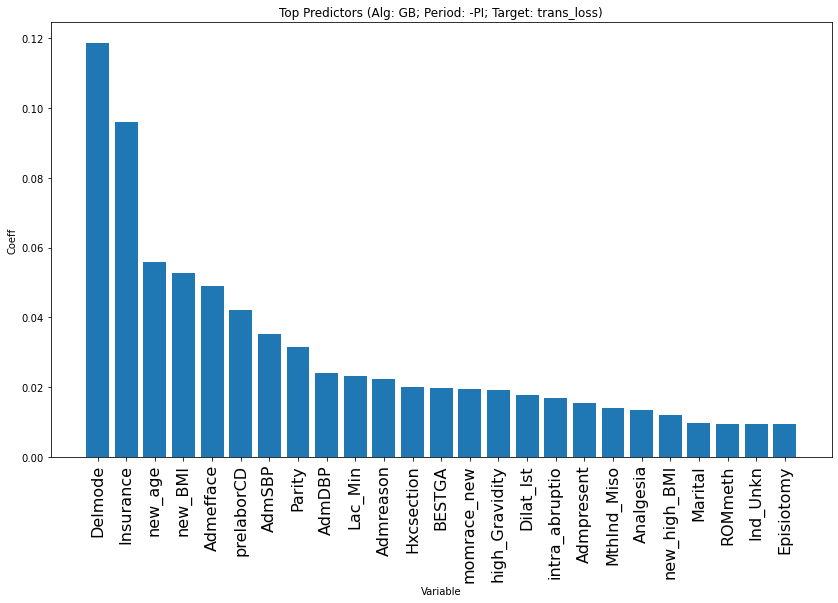

In [25]:
plt.rcParams["figure.figsize"] = (14, 8)
x_labels = top_pred.index.values[0:25]
print(x_labels)
fig, ax = plt.subplots(1,1)  # Create a figure and an axes.
ax.set_title('Top Predictors' + " (Alg: " + alg + "; Period: " + period + "; Target: " + targ + ")")
ax.bar(x_labels, top_pred.values[0:25])
ax.set_ylabel('Coeff')
ax.set_xlabel('Variable')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
#plt.xlim(1,20)
plt.show()

In [26]:
base = glob.escape(files[top_index][:-20])
print(base)
#base = glob.escape(base)
#print(base)

trans_loss-PI-ALL-NONE-GB-friedman_mse_0.1_5_10_30_30_100_7_0.8-1-1.0


In [27]:
#path = inpath + alg + '/output/'
ft_glob = base + "*" + '_fpr_tpr.dat'
pr_glob = base + "*" + '_pr.dat'
pred_glob = base + "*" + '_pred.dat'
prob_glob = base + "*" + '_probs.dat'
print(glob.glob(ft_glob))
print(glob.glob(pr_glob))
print(glob.glob(pred_glob))
print(glob.glob(prob_glob))

['trans_loss-PI-ALL-NONE-GB-friedman_mse_0.1_5_10_30_30_100_7_0.8-1-1.0-20211124_162414_fpr_tpr.dat']
['trans_loss-PI-ALL-NONE-GB-friedman_mse_0.1_5_10_30_30_100_7_0.8-1-1.0-20211124_162414_pr.dat']
['trans_loss-PI-ALL-NONE-GB-friedman_mse_0.1_5_10_30_30_100_7_0.8-1-1.0-20211124_162414_pred.dat']
['trans_loss-PI-ALL-NONE-GB-friedman_mse_0.1_5_10_30_30_100_7_0.8-1-1.0-20211124_162414_probs.dat']


In [28]:
fpr, tpr, thresholds = np.loadtxt(glob.glob(ft_glob)[0], delimiter=',')
precision, recall, pr_thresh = np.loadtxt(glob.glob(pr_glob)[0], delimiter=',')
y_test, y_pred = np.loadtxt(glob.glob(pred_glob)[0], dtype=int, delimiter=',')
probs = np.loadtxt(glob.glob(prob_glob)[0], delimiter=',')
prob1 = probs[:,1]

In [29]:
probs

array([[0.98343313, 0.01656687],
       [0.7987404 , 0.2012596 ],
       [0.50544591, 0.49455409],
       ...,
       [0.977164  , 0.022836  ],
       [0.98369131, 0.01630869],
       [0.73437808, 0.26562192]])

In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, auc, roc_auc_score, precision_score, recall_score
from imblearn.metrics import geometric_mean_score, sensitivity_specificity_support
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc_s_prob = roc_auc_score(y_test, prob1)
pr_auc = auc(recall, precision)
recall = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
print(f' recall = {recall}')
print(f'   prec = {prec}')
print(f'    MCC = {mcc}')
print(f' PR_AUC = {pr_auc}')
print(f'ROC_AUC = {roc_auc_s_prob}')
print(f' recall, {recall}')
print(f'   prec, {prec}')
print(f'    MCC, {mcc}')
print(f' PR_AUC, {pr_auc}')
print(f'ROC_AUC, {roc_auc_s_prob}')
# Note: pos_label does not appear to have any effect
gmean_none = geometric_mean_score(y_test, y_pred, average=None)
print(f'gmean_none    = {gmean_none}')
gmean_macro = geometric_mean_score(y_test, y_pred, average='macro')
print(f'gmean_macro   = {gmean_macro}')
sens, spec, ss_supp = sensitivity_specificity_support(y_test, y_pred, average=None)
print(f'sens   = {sens}')
print(f'spec   = {spec}')

[[3913  831]
 [  28   55]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      4744
           1       0.06      0.66      0.11        83

    accuracy                           0.82      4827
   macro avg       0.53      0.74      0.51      4827
weighted avg       0.98      0.82      0.89      4827

 recall = 0.6626506024096386
   prec = 0.062076749435665914
    MCC = 0.16370044652586252
 PR_AUC = 0.07389861120861868
ROC_AUC = 0.8243208923383246
 recall, 0.6626506024096386
   prec, 0.062076749435665914
    MCC, 0.16370044652586252
 PR_AUC, 0.07389861120861868
ROC_AUC, 0.8243208923383246
gmean_none    = [0.73930711 0.73930711]
gmean_macro   = 0.7437409841727789
sens   = [0.82483137 0.6626506 ]
spec   = [0.6626506  0.82483137]


In [32]:
print(f'y_test.shape = {y_test.shape}')
print(f'prob1.shape = {prob1.shape}')

y_test.shape = (4827,)
prob1.shape = (4827,)


In [33]:
# roc_auc vs roc_auc_score
from sklearn.metrics import roc_auc_score, auc
roc_auc_s_prob = roc_auc_score(y_test, prob1)
roc_auc = auc(fpr, tpr)
print(f'roc_auc_s_prob = {roc_auc_s_prob}')
print(f'roc_auc(auc) = {roc_auc}')

roc_auc_s_prob = 0.8243208923383246
roc_auc(auc) = 0.8243208923383246


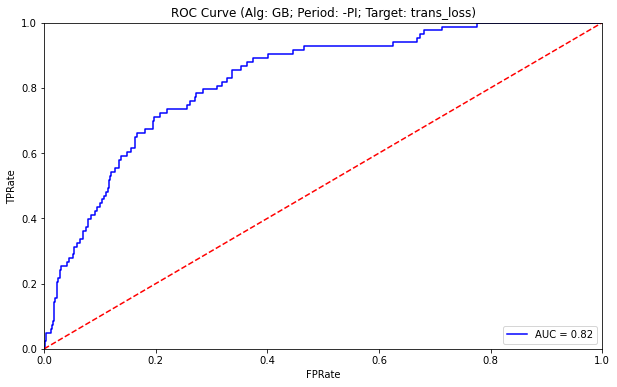

In [34]:
from sklearn.metrics import auc
plt.rcParams["figure.figsize"] = (10, 6)
roc_auc = auc(fpr, tpr)
plt.title("ROC Curve (Alg: " + alg + "; Period: " + period + "; Target: " + targ + ")")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPRate')
plt.xlabel('FPRate')
plt.show()

TypeError: Singleton array 0.6626506024096386 cannot be considered a valid collection.

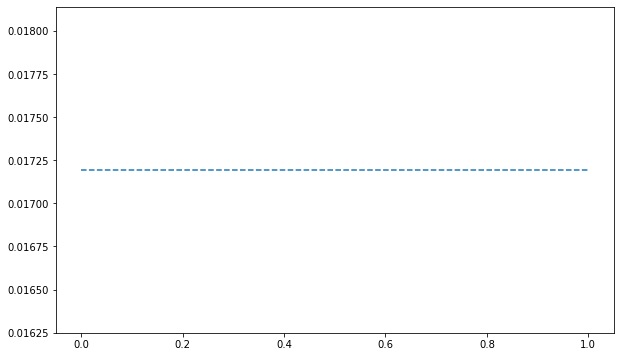

In [35]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test==1]) / len(y_test)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle= '--', label= f'No Skill: {no_skill:.3f}')

pr_auc = auc(recall, precision)
plt.title('PR Curve')
plt.plot(recall, precision, 'g', label = 'PR_AUC = %0.3f' % pr_auc)
plt.legend(loc = 'upper right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
print(len(y_test[y_test==1]))
print(len(y_test))

In [ ]:
from sklearn.metrics import average_precision_score
print(f'PR_AUC = {pr_auc}')
print(f'AP     = {average_precision_score(y_test, prob1)}')

# Threshold Moving

In [ ]:
prob1

In [ ]:
plt.title('Probabilities')
plt.hist(prob1, bins=50)
plt.ylabel('Counts')
plt.xlabel('Minority probability')
plt.show()

In [ ]:
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
plt.plot(gmeans)
plt.show()

In [ ]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print(f'max_ix = {ix}')
print( ' Best Threshold=%f, G-mean=%.3f ' % (thresholds[ix], gmeans[ix]))

In [ ]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, 'r', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
print(f'ix = {ix}; fpr[ix] = {fpr[ix]}; tpr[ix]={tpr[ix]}')

In [ ]:
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print( ' Best Threshold=%f, F-measure=%.3f ' % (pr_thresh[ix], fscore[ix]))

In [ ]:
#no_skill = len(y_test[y_test==1]) / len(y_test)
#plt.plot([0,1], [no_skill,no_skill], linestyle= '--' , label= 'No Skill' )
plt.plot(recall, precision, label= 'PR curve' )
plt.scatter(recall[ix], precision[ix], marker= 'o' , color= 'black' , label= 'Best' )
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, normalize='true'))
print(confusion_matrix(y_test, y_pred, normalize='pred'))
print(confusion_matrix(y_test, y_pred, normalize='all'))

In [ ]:
print(f'top_index = {top_index}')
top_coeffs = pd.DataFrame(coeffs_df[top_index])
#top_coeffs = pd.DataFrame(coeffs_df[top_index], columns=['coeff'])
top_coeffs.rename(columns={top_index:'coeff'}, inplace=True)
top_coeffs.index.name = 'Variable'
top_coeffs.sort_values(by='coeff', ascending=False, inplace=True)
top_coeffs

## Calibration curves 

In [ ]:
from sklearn.calibration import calibration_curve
def plot_calibration(name, y_test, prob1, bins=10, **kwargs):
    fop, mpv = calibration_curve(y_test, prob1, n_bins=bins)
    
    plt.plot(mpv, fop, label=name, **kwargs)
    plt.xlabel('Mean Predicted Value')
    plt.ylabel('Fraction of Positives')
    plt.grid(True)

In [ ]:
alg

In [ ]:
from sklearn.metrics import brier_score_loss
brier_score = brier_score_loss(y_test, prob1)
plot_name = '{} Brier = {:.3f}'.format(alg, brier_score)
plot_calibration(plot_name, y_test, prob1, bins=20)
plt.plot([0,1],[0,1], linestyle='--', color='black', label='Perfectly Calibrated')
plt.title('Calibraion Curve')
plt.legend(loc='upper left')

## Note: Cramer comparison not working with high_EBL target 

# Compare Cramer to "top index" coefficients

In [ ]:
cramfile =  cramer_df = '/MFMDatasets/MFM_bopf/data/csl/Cramer-corr-' + top_target + '.csv'
print(cramfile)
cramer_df = pd.read_csv(cramfile, header=None, index_col=0, names = ['Variable', 'Cramer_corr'])
cramer_df['Cramer_rank'] = cramer_df['Cramer_corr'].rank(ascending=False).astype(int)
cramer_df

In [ ]:
top_coeffs['coeff_rank'] = top_coeffs['coeff'].rank(ascending=False).astype(int)
top_coeffs

In [ ]:
print(top_index)
small.loc[top_index].head()

In [ ]:
top_target = small.loc[top_index]['target']
top_target

In [ ]:
compare_df = pd.merge(top_coeffs, cramer_df, how='inner', on='Variable')
compare_df

In [ ]:
#
# @author: Ritesh Agrawal
# @Date: 13 Feb 2013
# @Description: This is an implementation of rank biased overlap score 
# (Refererence: http://www.umiacs.umd.edu/~wew/papers/wmz10_tois.pdf). 
# This is a modified implementation of  https://github.com/maslinych/linis-scripts/blob/master/rbo_calc.py
# It is a linear implementation of the RBO and assumes there are no
# duplicates and doesn't handle for ties. 
#

def score(l1, l2, p = 0.98):
    """
        Calculates Ranked Biased Overlap (RBO) score. 
        l1 -- Ranked List 1
        l2 -- Ranked List 2
    """
    if l1 == None: l1 = []
    if l2 == None: l2 = []
    
    sl,ll = sorted([(len(l1), l1),(len(l2),l2)])
    s, S = sl
    l, L = ll
    if s == 0: return 0

    # Calculate the overlaps at ranks 1 through l 
    # (the longer of the two lists)
    ss = set([]) # contains elements from the smaller list till depth i
    ls = set([]) # contains elements from the longer list till depth i
    x_d = {0: 0}
    sum1 = 0.0
    for i in range(l):
        x = L[i]
        y = S[i] if i < s else None
        d = i + 1
        
        # if two elements are same then 
        # we don't need to add to either of the set
        if x == y: 
            x_d[d] = x_d[d-1] + 1.0
        # else add items to respective list
        # and calculate overlap
        else: 
            ls.add(x) 
            if y != None: ss.add(y)
            x_d[d] = x_d[d-1] + (1.0 if x in ss else 0.0) + (1.0 if y in ls else 0.0)     
        #calculate average overlap
        sum1 += x_d[d]/d * pow(p, d)
        
    sum2 = 0.0
    for i in range(l-s):
        d = s+i+1
        sum2 += x_d[d]*(d-s)/(d*s)*pow(p,d)

    sum3 = ((x_d[l]-x_d[s])/l+x_d[s]/s)*pow(p,l)

    # Equation 32
    rbo_ext = (1-p)/p*(sum1+sum2)+sum3
    return rbo_ext
    

In [ ]:
from scipy.stats import kendalltau, mannwhitneyu
# Calculate Rank-Based Overlap score
rbo = score(compare_df['Cramer_rank'].tolist(), compare_df['coeff_rank'].tolist())
print(f'rbo = {rbo}')
ken_tau = kendalltau(compare_df['Cramer_rank'].tolist(), compare_df['coeff_rank'].tolist())
print(f'ken_tau = {ken_tau}')
mann_whit = mannwhitneyu(compare_df['Cramer_rank'].tolist(), compare_df['coeff_rank'].tolist())
print(f'mann_whit = {mann_whit}')
print(f'CLF_time(min) = {combo.loc[top_index]["CLF_time(min)"]}')
print(f'{SORT_STAT} = {combo.loc[top_index][SORT_STAT]}')


In [ ]:
file = outdir + '/cramer_compare/' + alg + period + '-' + SORT_STAT + '-CramerCoeffComp.csv'
with open(file, 'w', newline='') as outfile:
    print(f'Algorithm, {alg}', file=outfile)
    print(f'Target, {top_target}', file=outfile)
    print(f'RBO, {rbo:.3f}', file=outfile)
    print(f'Kendall_tau, {ken_tau.correlation:.3f}', file=outfile)
    print(f'CLF_time(min) = {combo.loc[top_index]["CLF_time(min)"]}', file=outfile)
    print(f'{SORT_STAT} = {combo.loc[top_index][SORT_STAT]}\n', file=outfile)
#    print(f'MannWhitneyU, {mann_whit.statistic:.3f}\n', file=outfile)
    
if out_flag:
    compare_df.to_csv(file, mode='a', float_format='%0.6f')